##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Flower classification with TensorFlow Lite Model Maker with TensorFlow 2.0

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/lite/codelabs/flower_classification/ml/Flower_Classification_with_TFLite_Model_Maker.ipynb">      
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/lite/codelabs/flower_classification/ml/Flower_Classification_with_TFLite_Model_Maker.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify flowers on a mobile device.

## Prerequisites

To run this example, we first need to make a copy of this notebook. Click on "Copy to Drive" at the top of this notebook. Then we need to install serveral required packages, including Model Maker package that in github [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [ ]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 591 kB 12.2 MB/s 
     |████████████████████████████████| 103 kB 45.1 MB/s 
     |████████████████████████████████| 1.1 MB 33.6 MB/s 
     |████████████████████████████████| 6.3 MB 36.7 MB/s 
     |████████████████████████████████| 840 kB 40.8 MB/s 
     |████████████████████████████████| 636 kB 31.4 MB/s 
     |████████████████████████████████| 1.1 MB 36.2 MB/s 
     |████████████████████████████████| 64 kB 2.8 MB/s 
     |████████████████████████████████| 213 kB 52.0 MB/s 
     |████████████████████████████████| 1.2 MB 37.1 MB/s 
     |████████████████████████████████| 120 kB 52.1 MB/s 
     |████████████████████████████████| 87 kB 6.8 MB/s 
     |████████████████████████████████| 37.1 MB 51 kB/s 
     |████████████████████████████████| 352 kB 41.3 MB/s 
     |████████████████████████████████| 99 kB 8.6 MB/s 
     |████████████████████████████████| 207 kB 41.6 MB/s 


Import the required packages.

In [ ]:
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

import tensorflow as tf
assert tf.__version__.startswith('2')

import matplotlib.pyplot as plt
import numpy as np

## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [ ]:
image_path = tf.keras.utils.get_file(
      'flower_photos',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      untar=True)

228827136/228813984 [==============================] - 3s 0us/step


You could replace `image_path` with your own image folders. As for uploading data to colab, you could find the upload button in the left sidebar shown in the image below with the red rectangle. Just have a try to upload a zip file and unzip it. The root file path is the current path.

<img src="https://storage.googleapis.com/download.tensorflow.org/models/tflite/screenshots/model_maker_image_classification.png" alt="Upload File" width="800" hspace="100">

If you prefer not to upload your images to the cloud, you could try to run the library locally following the [guide](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker) in github.

### Run the example
The example just consists of 4 lines of code as shown below, each of which representing one step of the overall process.


1.   Load input data specific to an on-device ML app. Split it to training data and testing data.

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


2. Customize the TensorFlow model. See [docs](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier/ImageClassifier) for choices.

In [ ]:
model = image_classifier.create(train_data, model_spec='efficientnet_lite0')

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
103/103 [==============================] - 49s 171ms/step - loss: 0.8459 - accuracy: 0.7834
Epoch 2/5
103/103 [==============================] - 17s 168ms/step - loss: 0.6565 - accuracy: 0.8932
Epoch 3/5
103/103 [==============================] - 17s 168ms/step - loss: 0.6190 - accuracy: 0.9154
Epoch 4/5
103/103 [==============================] - 17s 169ms/step - loss: 0.5970 - accuracy: 0.9290
Epoch 5/5
103/103 [==============================] - 17s 166ms/step - loss: 0.5887 - accuracy: 0.9302


3. Evaluate the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 7s 195ms/step - loss: 0.6097 - accuracy: 0.9046


4.  Export to TensorFlow Lite model.
You could download it in the left sidebar same as the uploading part for your own use.

In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp698ora23/assets


INFO:tensorflow:Assets written to: /tmp/tmp698ora23/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpbg3kpv75/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpbg3kpv75/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


5. Download the trained model by clicking on the folder icon on the left hand side. Right-click on "model.tflite" and select download. Or run the following code:

In [ ]:
from google.colab import files
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. Inferencing using tflite model. Download some sample test images and preprocess them so that you can run inference with the model.

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg
!wget https://cdn.shopify.com/s/files/1/0011/4170/2746/products/12RedRosesKoreanStyle_002_600x.jpg
!wget https://www.insidescience.org/sites/default/files/2020-06/Dandelion_topNteaser.jpg

--2021-10-09 16:34:39--  https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279544 (273K) [image/jpeg]
Saving to: ‘1200px-Sunflower_sky_backdrop.jpg’

1200px-Sunflower_sk 100%[===================>] 272.99K  --.-KB/s    in 0.1s    

2021-10-09 16:34:39 (2.74 MB/s) - ‘1200px-Sunflower_sky_backdrop.jpg’ saved [279544/279544]

--2021-10-09 16:34:39--  https://cdn.shopify.com/s/files/1/0011/4170/2746/products/12RedRosesKoreanStyle_002_600x.jpg
Resolving cdn.shopify.com (cdn.shopify.com)... 151.101.1.12, 151.101.129.12, 151.101.193.12, ...
Connecting to cdn.shopify.com (cdn.shopify.com)|151.101.1.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121164 (118K) [i

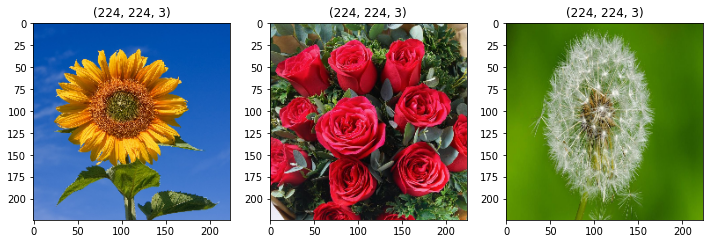

In [ ]:
import cv2

# Load and preprocess images
image_list = []

def load_image(image_path):
    test_image = cv2.imread(image_path)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    test_image = cv2.resize(test_image, (224, 224))
    image_list.append(test_image)

load_image('1200px-Sunflower_sky_backdrop.jpg')
load_image('12RedRosesKoreanStyle_002_600x.jpg')
load_image('Dandelion_topNteaser.jpg')

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    ax[i].imshow(image_list[i]);
    ax[i].set_title(image_list[i].shape);

In [ ]:
test_image_samples = np.array(image_list)
test_image_samples.shape

(3, 224, 224, 3)

In [ ]:
interpreter = tf.lite.Interpreter(model_path='model.tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 224 224   3]
Input Type: <class 'numpy.uint8'>
Output Shape: [1 5]
Output Type: <class 'numpy.uint8'>


In [ ]:
interpreter.get_input_details()

[{'dtype': numpy.uint8,
  'index': 0,
  'name': 'input_1',
  'quantization': (0.003921568859368563, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([0.00392157], dtype=float32),
   'zero_points': array([0], dtype=int32)},
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([ -1, 224, 224,   3], dtype=int32),
  'sparsity_parameters': {}}]

In [ ]:
interpreter.get_output_details()

[{'dtype': numpy.uint8,
  'index': 168,
  'name': 'Identity',
  'quantization': (0.00390625, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([0.00390625], dtype=float32),
   'zero_points': array([0], dtype=int32)},
  'shape': array([1, 5], dtype=int32),
  'shape_signature': array([-1,  5], dtype=int32),
  'sparsity_parameters': {}}]

7. Observe the results.

In [ ]:
# Manually set sample size to 3
interpreter.resize_tensor_input(input_details[0]['index'], (3, 224, 224, 3))
interpreter.resize_tensor_input(output_details[0]['index'], (3, 5))

# Run inference using interpreter
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], test_image_samples)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])

# Print predictions
labels = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
print(tflite_model_predictions)
print('Prediction:', [labels[ind] for ind in np.argmax(tflite_model_predictions, axis=1)])

[[  3   9   3 240   2]
 [  3   5 227   2  19]
 [  5 227   5  14   5]]
Prediction: ['sunflowers', 'roses', 'dandelion']


For a more comprehensive guide to TFLite Model Maker, please refer to this [notebook](https://colab.sandbox.google.com/github/tensorflow/examples/blob/master/tensorflow_examples/lite/model_maker/demo/image_classification.ipynb) and its [documentation](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).